
MÁSTER BIG DATA & DATA ENGINEERING

Programación avanzada en Python

Autores: Luis Llana Díaz & Yolanda García Ruiz



# Trabajo final

## Nota Preliminar

Antes de desarrollar el proyecto, es aconsejable leer el enunciado completamente, incluyendo las instrucciones de entrega y otros consejos que se  recogen al final de este enunciado.
En este enunciado se pueden producir cambios durante su desarrollo por distintos motivos: porque se descubre una situación anómala que no ha sido prevista al preparar el enunciado, porque algún estudiante encuentre un error o ambigüedad en la descripción o en los datos de partida o por cualquier otra causa. Esto ocurre también en cualquier proyecto real, así que tomárselo con el mejor talante y aprender también de estas eventuales contingencias. Se procurará informar debidamente del mejor modo posible cuando esto se produzca.


## Introducción

En el portal de datos abiertos de la EMT de Madrid se puede encontrar abundante información sobre transporte y movilidad de la ciudad. En particular los datos relativos a la utilización del servicio de bicicletas eléctricas del ayuntamiento de Madrid.
La dirección del portal mencionado es la siguiente:

https://opendata.emtmadrid.es/Home

y el enlace donde se encuentran los datos relativos a BiciMAD es el siguiente:

https://opendata.emtmadrid.es/Datos-estaticos/Datos-generales-(1)

En esta página podemos encontrar los datos de uso de BiciMAD por meses desde abril de 2019 hasta el mes Febrero de 2023. Se trata de un conjunto de URLs a ficheros comprimidos ZIP, donde una vez descomprimidos, podemos encontrar un fichero en formato `csv`.
En esta práctica __solo nos va a interesar los datos de uso desde junio el 2021__. Son ficheros con nombre:

`
trips_YY_MM_monthName.csv
`

donde `YY` representa el año, `MM` representa el mes y `monthName` representa el nombre del mes en inglés.

Los datos del mes 10 del año 2021 está mal generado por la EMT, por lo que se pide que no se use ese fichero.

### Metadatos

En cada uno de los ficheros `csv` podemos encontrar los siguientes datos:

* `date` (Fecha): La fecha en la que tuvo lugar el viaje.
* `idbike` (ID de Bicicleta): El identificador único de la bicicleta utilizada para el viaje.
* `fleet` (Flota): La flota a la que pertenece la bicicleta utilizada.
* `trip_minutes` (Duración del Viaje en Minutos): La duración del viaje en minutos.
* `geolocation_unlock` (Geolocalización de Desbloqueo): Las coordenadas geográficas del lugar de inicio del viaje.
* `address_unlock` (Dirección de Desbloqueo): La dirección postal en la que se desbloqueó la bicicleta.
* `unlock_date` (Fecha y Hora de Desbloqueo): La fecha y hora exactas en las que comenzó el viaje.
* `locktype` (Tipo de Bloqueo): El estado de la bicicleta antes del viaje. Puede estar anclada en una estación o simplemente bloqueada en cualquier lugar libremente.
* `unlocktype` (Tipo de Desbloqueo): El estado de la bicicleta después del viaje.
* `geolocation_lock` (Geolocalización de Bloqueo): Las coordenadas geográficas del lugar final del viaje.
* `address_lock` (Dirección de Bloqueo): La dirección postal en la que se bloqueó la bicicleta.
* `lock_date` (Fecha y Hora de Bloqueo): La fecha y hora exactas en las que finalizó el viaje.
* `station_unlock` (Número de Estación de Desbloqueo): El número de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
* `dock_unlock` (Muelle de Desbloqueo): El muelle de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
*  `unlock_station_name` (Nombre de la Estación de Desbloqueo): El nombre de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
* `station_lock` (Número de Estación de Bloqueo): El número de la estación en la que la bicicleta estaba anclada después del viaje, si la había.
* `dock_lock` (Muelle de Bloqueo): El muelle de la estación en la que la bicicleta estaba anclada después del viaje, si la había.
* `lock_station_name` (Nombre de la Estación de Bloqueo): El nombre de la estación en la que la bicicleta estaba anclada después del viaje, si la había.

## Librerías

Importar todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.

In [1]:
# Importar librerías
import re
import requests
import zipfile
import io
from typing import TextIO, Set
import pandas as pd
import matplotlib.pyplot as plt



### La descarga de los ficheros

En este notebook vamos a estudiar únicamente los datos de febrero de 2023.
La URL que permite descargar dichos datos es la siguiente:

In [2]:
url = "https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx"

Observa que en la URL aparece la cadena `trips_23_02`, y que el fichero ZIP tiene un archivo de datos en formato csv llamado `trips_23_02_February.csv`.


__Se pide:__
 Escribir una función llamada `csv_from_zip` que reciba como único argumento un string que represente la URL al fichero ZIP de datos de uso y devuelva un fichero en formato CSV. El tipo del objeto devuelto es `TextIO`. La función  lanzará una excepción de tipo `ConnectionError` en caso de que falle la petición al servidor de la EMT.

__Observaciones:__
En el notebook `05_ficheros` del módulo de `Secuencias` se habla del manejo de ficheros en formato ZIP, y de cómo leer un fichero, transformarlo en una cadena de caracteres para posteriormente, usando el método `String.IO`, obtener un fichero de texto.
Deberás importar el módulo `typing`.

In [3]:
# Solución:
def csv_from_zip(url: str) -> TextIO:
    """
    Descarga un archivo ZIP desde una URL, extrae el archivo CSV y lo devuelve como un objeto IO.
    
    Parameters:
    --------
    url: str
        La URL del archivo ZIP a descargar.
        
    Returns:
    -------
    TextIO
        Un objeto TextIO con los datos del archivo CSV.
        
    Raises:
    --------
    ConnectionError:
        Si ocurre un error al descargar o extraer el archivo ZIP.
        
    Examples:
    --------
    >>> datos_csv = csv_from_zip(url)
    >>> type(datos_csv)
    <class '_io.StringIO'>
    """    
    try:
        # Petición para obtener el archivo ZIP
        response = requests.get(url)
        response.raise_for_status()  # Da un error si la petición no válida
        
        # Extrae los registros del ZIP
        with zipfile.ZipFile(io.BytesIO(response.content)) as z:
            # Busca el nombre del archivo dentro del ZIP, asumiendo que solo hay uno
            nombre_archivo_csv = [name for name in z.namelist() if name.endswith('.csv')][0]
            # Lee el contenido del archivo y transformarlo a TextIO
            contenido_csv = io.StringIO(z.read(nombre_archivo_csv).decode('utf-8'))
        
        return contenido_csv
    
    except requests.exceptions.RequestException as e:
        # Muestra un mensaje en el caso de error de la consulta
        raise ConnectionError("No se puede descargar el archivo ZIP") from e
            

In [4]:
# Prueba
archivo_csv = csv_from_zip(url)
print(type(archivo_csv))

<class '_io.StringIO'>


### Creación del dataframe de datos

__Se pide:__
Crear una función llamada `get_data` que reciba como único argumento un fichero csv y que devuelva un objeto de tipo DataFrame con las siguientes restricciones:
* El índice del dataframe debe ser a fecha en la que tuvo lugar el viaje (usa el argumento `index_col`).
* Todas las fechas que aparecen en los datos ha de tener tipo `datetime` (usa el argumento 'parse_dates`).
* De todas las columnas que hay en el fichero, solo nos interesan las siguientes:

   ```
     [ 'idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock', 'unlock_date', 'locktype',
     'unlocktype', 'geolocation_lock', 'address_lock', 'lock_date', 'station_unlock', 'unlock_station_name',
     'station_lock', 'lock_station_name']
   ```

por lo que el dataframe ha de tener solo dichas columnas.

__Observaciones:__ Observa que los datos de usos que publica la EMT son fichero CSV donde el separador de campos es el símbolo `;`.

In [5]:
# Solución
def get_data(archivo_csv: TextIO) -> pd.DataFrame:
    """
    Recibe un archivo CSV y devuelve un objeto de tipo DataFrame.
    
    Parameters:
    --------
    archivo_csv: TextIO 
        Objeto de texto que representa al archivo CSV.
    
    Returns:
    --------
    pd.DataFrame
        Objeto DataFrame que cumple con las restricciones marcadas.
    """
    
    # Columnas que nos interesan
    columnas = ['idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock',
                'unlock_date', 'locktype','unlocktype', 'geolocation_lock', 'address_lock', 
                'lock_date', 'station_unlock', 'unlock_station_name', 'station_lock', 'lock_station_name']
    
    # Definición del DataFrame
    df = pd.read_csv(   
        archivo_csv, 
        sep=';', 
        usecols=columnas,
        index_col='unlock_date',
        parse_dates=['unlock_date', 'lock_date']
    )
    return df

In [6]:
# prueba
csvfile = csv_from_zip(url)
usos = get_data(csvfile)
usos.head()

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
unlock_date,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2023-02-01 00:00:10,7337.0,1.0,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle Jesús nº 1',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nº 16 ',2023-02-01 00:05:41,31.0,27 - Huertas,43.0,39 - Plaza de la Cebada
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2023-02-01 00:00:25,5098.0,1.0,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01 00:00:44,52.0,48 - Embajadores 2,52.0,48 - Embajadores 2
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


### Explorar la estructura de los datos en el dataframe

El método `info` devuelve información acerca de la estructura de un dataframe.

__Se pide:__
Escribe el código necesario para crear un dataframe llamado `usos` a partir de la url "https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx".
Ejecuta el método `info()` sobre el dataframe y comenta los resultados.
Fíjate en las columnas que representan fechas y comprueba su tipo de datos. ¿Cuántas filas se han cargado?. Fíjate en los valores distintos de `NaN` en cada una de las columnas.

In [7]:
# Solución
def csv_from_zip(url: str) -> TextIO:
    """
    Descarga un archivo ZIP desde una URL, extrae el archivo CSV y lo devuelve como un objeto TextIO.
    
    Parameters:
    --------
    url: str
        La URL del archivo ZIP que se debe descargar.
        
    Returns:
    --------
    Text IO
        Un objeto TextIO que muestra el contenido del archivo CSV.
        
    Raises:
    --------
    ConnectionError
        Si ocurre un error al descargar o extraer el archivo ZIP. 
    """
    try:
        respuesta = requests.get(url)
        respuesta.raise_for_status()
        with zipfile.ZipFile(io.BytesIO(respuesta.content)) as z:
            csv_nombre = [name for name in z.namelist() if name.endswith('.csv')][0]
            with z.open(csv_nombre) as csv_file:
                csv_contenido = io.StringIO(z.read(csv_nombre).decode('utf-8'))
        return csv_contenido
    except requests.exceptions.RequestException as e:
        raise ConnectionError ("No se puede descargar el archivo ZIP") from e            

In [8]:
# Prueba
archivo_csv = csv_from_zip("https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx")
usos = get_data(archivo_csv)
usos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336988 entries, NaT to 2023-02-18 07:22:48
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   idBike               168494 non-null  float64       
 1   fleet                168494 non-null  float64       
 2   trip_minutes         168494 non-null  float64       
 3   geolocation_unlock   168494 non-null  object        
 4   address_unlock       168494 non-null  object        
 5   locktype             168494 non-null  object        
 6   unlocktype           168494 non-null  object        
 7   geolocation_lock     168494 non-null  object        
 8   address_lock         168494 non-null  object        
 9   lock_date            168494 non-null  datetime64[ns]
 10  station_unlock       168114 non-null  float64       
 11  unlock_station_name  168114 non-null  object        
 12  station_lock         168018 non-null  float64       
 

- El DataFrame tiene 336.988 entradas y cuenta con las 14 columnas de interés.
- Contamos con 5 columnas de tipo 'float64', 8 de tipo 'object' (sus valores suelen ser cadenas de texto) y 1 de tipo 'datetime64[ns]' (indicado para horas y fechas).
- El índice del DataFrame corresponde a la fecha en la que tuvo lugar el viaje ('DatetimeIndex'). 
- El tipo de valor temporal 'datetime64[ns]' de 'lock_date' es el adecuado para nuestro caso de uso. 
- 38,6 MB de espacio ocupado.
- Todas las columnas tiene un considerable número de valores 'NaN'. Este hecho refleja que existen numerosos registros o entradas incompletas. 
  Como es el caso del campo identificador de bicicletas 'idBike'.  
- Las variables asociadas a las estaciones ('station_unlock', 'unlock_station_name', 'station_lock', 'lock_station_name') cuentan con un mayor número de nulos, 
  respecto al resto de campos.   

### Borrado de valores NaN.

El método  `dropna` de los DataFrames tiene un argumento `how` que permite indicar que se borren filas o columnas donde todos los valores son `NaN`.

__Se pide:__ Crear una función llamada `delete_nan_rows` que borre las filas con todos sus valores `NaN` de un dataframe recibido como argumento. La función modifica el dataframe y no devuelve nada.  

Comenta los resultados. Prueba la función `delete_nan_rows` con el dataframe `usos`. Comprueba que el número de filas del dataframe `usos` ha cambiado. Puedes volver a ejecutar el método `info` y compáralo con el resultado antes de invocar a la función `delete_nan_rows`.

In [9]:
# Solución
def delete_nan_rows(df: pd.DataFrame) -> None:
    """
    Borra todas las filas del DataFrame donde todos sus valores son 'NaN'.
    
    Parameters:
    --------
    df: pd.DataFrame
        El DataFrame a modificar. 
    
    Returns:
    --------
    No devuelve nada.  
    """
    df.dropna(axis=0, how='all', inplace=True)

In [10]:
# Prueba
print("Antes de borrar filas con 'NaN'")
usos.info()
delete_nan_rows(usos)
print("\nDespués de borrar filas con 'NaN'")
usos.info()

Antes de borrar filas con 'NaN'
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336988 entries, NaT to 2023-02-18 07:22:48
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   idBike               168494 non-null  float64       
 1   fleet                168494 non-null  float64       
 2   trip_minutes         168494 non-null  float64       
 3   geolocation_unlock   168494 non-null  object        
 4   address_unlock       168494 non-null  object        
 5   locktype             168494 non-null  object        
 6   unlocktype           168494 non-null  object        
 7   geolocation_lock     168494 non-null  object        
 8   address_lock         168494 non-null  object        
 9   lock_date            168494 non-null  datetime64[ns]
 10  station_unlock       168114 non-null  float64       
 11  unlock_station_name  168114 non-null  object        
 12  station_lock         1

Comparando la información del dataframe usos antes y después de invocar a la función 'delete_nan_rows', alcanzo las siguientes conclusiones:
- Se han eliminado 168.494 filas del dataframe 'usos' que tenían todos sus valores como 'NaN'. 
- Tras la invocación de la función 'delete_nan_rows' el dataframe cuenta con 168.494 registros, que es justamente la mitad que antes de la invocación.
- Las columnas 'station_unlock', 'unlock_station_name', 'station_lock' y 'lock_station_name' siguen teniendo menos valores no nulos que el total de las entradas del dataframe. 
  Ésto nos indica que áun tenemos valores 'Nan' en estos campos. 
- El uso de memoria se ha ajustado casi a la mitad, pasando de 38,6 MB a 19,3 MB.   

###  Exploración de las columnas.

La columna `fleet` representa el tipo de flota de bicicleta eléctrica.
Las BiciMAD Go son free floating y se corresponden con tipo de flota 2. A diferencia de las BiciMAD normales, no tienen por qué dejarse en una estación de bicicletas, aunque existe la posibilidad de hacerlo. Su bloqueo se realiza por medio de un candado manual, aspecto en el que se diferencian de las otras bicis municipales.

Por otro lado, las columnas `locktype` y `unlocktype` tienen información del tipo de bloqueo y desbloqueo respectivamente.

__Se pide:__
* ¿Cuántos valores distintos hay en la columna `fleet` del dataframe `usos`?
* ¿Cuántos valores distintos hay en las columnas `locktype` y `unlocktype` del dataframe `usos`?

In [11]:
# Solución
print(f"La columna 'fleet' tiene {usos['fleet'].nunique()} valores distintos")
print(f"La columna 'locktype' tiene {usos['locktype'].nunique()} valores distintos")
print(f"La columna 'unlocktype' tiene {usos['unlocktype'].nunique()} valores distintos")

La columna 'fleet' tiene 2 valores distintos
La columna 'locktype' tiene 2 valores distintos
La columna 'unlocktype' tiene 2 valores distintos


### Cambio de tipo de datos

Las columnas  `idBike` y `fleet`  tienen tipo float, pero en realidad representan un identificador de bicicleta y de flota respectivamente.

__Se pide:__ Crear una función llamada `float_to_str` que cambie el tipo de una columna a tipo string. La función recibe como argumentos un dataframe y el nombre de una columna. La función no devuelve nada.
Si la columna no se encuentra entre las columnas del dataframe, la función no hace nada.

__Observaciones:__ Puedes usar la función `map` para aplicar la función de transformación.

Prueba la función con el datafame `usos` y  las columnas `idBike` y `fleet`.
De esta forma, el identificador de bicicleta `7337.0` pasará a ser `'7337'`. Ejecuta la función `info` sobre el dataframe `usos` para comprobar que los tipos asociados a esas columnas han cambiado.

In [12]:
# Solución
def float_to_str(df: pd.DataFrame, column_name: str) -> None:
    """
    Cambia el tipo de una columna de un dataframe a string.
    
    Parameters:
    --------
    df: pd.DataFrame
        El dataframe que se debe modificar.
    column_name: str
        El nombre de la columna a la que vamos a cambiar de tipo. 
        
    Returns:
    --------
    No devuelve nada.  
    """
    if column_name in df.columns:
        df[column_name] = df[column_name].map(lambda x: str(int(x)) if pd.notnull(x) else x)

In [13]:
# Prueba
float_to_str(usos, 'idBike')
float_to_str(usos, 'fleet')
usos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168494 entries, 2023-02-01 00:00:10 to 2023-02-18 07:22:48
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   idBike               168494 non-null  object        
 1   fleet                168494 non-null  object        
 2   trip_minutes         168494 non-null  float64       
 3   geolocation_unlock   168494 non-null  object        
 4   address_unlock       168494 non-null  object        
 5   locktype             168494 non-null  object        
 6   unlocktype           168494 non-null  object        
 7   geolocation_lock     168494 non-null  object        
 8   address_lock         168494 non-null  object        
 9   lock_date            168494 non-null  datetime64[ns]
 10  station_unlock       168114 non-null  float64       
 11  unlock_station_name  168114 non-null  object        
 12  station_lock         168018 non-null  

- Verificamos que el tipo de dato de los campos 'idBike' y 'fleet' ha cambiado de 'float64' a 'object'. 
  Este es el tipo que Pandas suele utilizar para representar cadenas de texto.
- Tiene sentido que en la función hayamos convertido el tipo 'float64' a 'int' prescindiendo de la parte decimal, antes de convertirlo a 'str'.  
  Ya que en el contexto de los identificadores, generalmente no queremos la parte decimal '.0' en el resultado. 
  Como ocurre con el identificador 7337.0 de tipo flotante, que pasa a ser la cadena de texto "7337". 

## Consultas

Las siguientes consultas se realizarán con el dataframe `usos` creado en los apartados anteriores.

### C1

¿Cuántas bicicletas han sido desbloqueadas de una estación y no se bloquean en ninguna?

In [14]:
# Solución
# Filtra los registros en los que la bicicleta fue desbloqueada en alguna estación y no se bloqueó en ninguna.
# Recupera la cantidad con el método len().
bicis_desbloqueadas_no_bloqueadas = len(usos[(usos['station_unlock'].notnull()) & (usos['station_lock'].isnull())])
bicis_desbloqueadas_no_bloqueadas

168

### C2

Seleccionar solo las bicicletas del tipo de flota '1'. El nuevo dataframe se ha de llamar `regular_fleet`.

In [15]:
# Solución
regular_fleet = usos[usos['fleet'] == '1']
regular_fleet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167692 entries, 2023-02-01 00:00:10 to 2023-02-18 07:22:48
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   idBike               167692 non-null  object        
 1   fleet                167692 non-null  object        
 2   trip_minutes         167692 non-null  float64       
 3   geolocation_unlock   167692 non-null  object        
 4   address_unlock       167692 non-null  object        
 5   locktype             167692 non-null  object        
 6   unlocktype           167692 non-null  object        
 7   geolocation_lock     167692 non-null  object        
 8   address_lock         167692 non-null  object        
 9   lock_date            167692 non-null  datetime64[ns]
 10  station_unlock       167692 non-null  float64       
 11  unlock_station_name  167692 non-null  object        
 12  station_lock         167692 non-null  

### C3

Crea una función llamada `day_time` para calcular las horas totales de uso de bicicletas por día del mes.
La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de horas.

Prueba la función anterior con el dataframe  `usos`.

__Opcional:__ Dibuja un diagrama de barras con el resultado de la función `day_time` sobre el dataframe `usos`. Utiliza el módulo `matplotlib.pyplot`.

In [16]:
# Solución
def day_time(df: pd.DataFrame) -> pd.Series:
    """
    Calcula las horas totales de uso de bicicletas por día del mes.
    
    Parameters:
    -------- 
    df: pd.DataFrame
        El dataframe a analizar.
        
    Returns:
    -------- 
    pd.Series: 
        Una serie donde el índice es la fecha y el valor es el número de horas.  
    """
    # Convertir la columna 'trip_minutes' a horas
    df['trip_hours'] = df['trip_minutes'] / 60
    
    # Agrupar por día y sumar las horas de viaje
    uso_diario = df.resample('D')['trip_hours'].sum()
    
    return uso_diario

# Probando la función con el dataframe 'usos'
uso_diario_usos = day_time(usos)
uso_diario_usos.head(10)

unlock_date
2023-02-01    4160.538500
2023-02-02    3435.122333
2023-02-03    3456.311667
2023-02-04    3640.818667
2023-02-05    3263.938167
2023-02-06    3372.989167
2023-02-07    2874.889500
2023-02-08    3446.484000
2023-02-09    3514.816500
2023-02-10    3596.700667
Freq: D, Name: trip_hours, dtype: float64

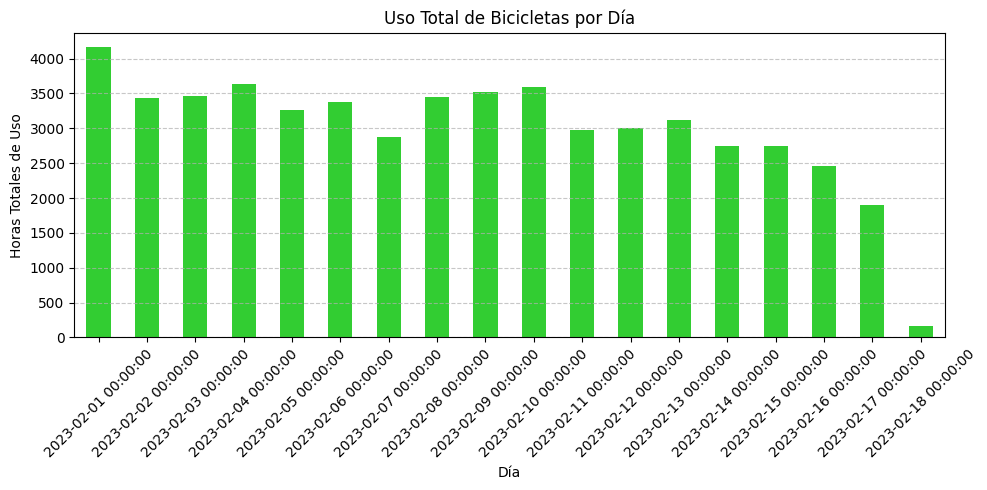

In [17]:
# Visualización de las horas totales de uso de las bicicletas

plt.figure(figsize=(10,5))
uso_diario_usos.plot(kind='bar', color='limegreen')
plt.title('Uso Total de Bicicletas por Día')
plt.xlabel('Día')
plt.ylabel('Horas Totales de Uso')
plt.grid(axis='y', linestyle='dashed', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### C4

Crea una función llamada `weekday_time` para calcular las horas totales de uso de bicicletas por día de la semana. La función recibe un dataframe y devuelve una Serie donde el índice es el día de la semana (L, M, X, J, V, S, D) y el valor es el número de horas.

Prueba la función anterior con el dataframe usos.



In [18]:
# Solución
def weekday_time(df: pd.DataFrame) -> pd.Series:
    """
    Calcula las horas totales de uso de bicicletas por día de la semana.
    
    Parameters:
    --------
    df: pd.DataFrame
        El dataframe a analizar.
        
    Returns:
    --------
    pd.Series: 
        Una serie donde el índice es el día de la semana (L, M, X, J, V, S, D) y
        el valor es el número de horas.    
    """
    # Transformar la columna 'trip_minutes' a horas si no está convertida
    if 'trip_hours' not in df.columns:
        df['trip_hours'] = df['trip_minutes'] / 60
        
    # Crear una columna en base al día de la semana (0 del lunes hasta el 6 del domingo)
    df['weekday'] = df.index.dayofweek
    
    # Imputamos a cada número su correspondiente día de la semana
    days = {0: 'L', 1: 'M', 2: 'X', 3: 'J', 4: 'V', 5: 'S', 6: 'D'}
    df['weekday'] = df['weekday'].map(days)
    
    # Agrupar por día de la semana y sumar las horas de viaje
    uso_semanal = df.groupby('weekday')['trip_hours'].sum()
    
    # Ordenar los días de la semana
    uso_semanal = uso_semanal.reindex(['L', 'M', 'X', 'J', 'V', 'S', 'D'])
    
    return uso_semanal

# Probamos la función con el dataframe 'usos'
uso_semanal_usos = weekday_time(usos)
uso_semanal_usos

weekday
L     6494.488500
M     5626.440667
X    10349.659667
J     9412.645333
V     8958.274000
S     6781.029667
D     6267.562167
Name: trip_hours, dtype: float64

### C5

Crea una función llamada `total_usage_day` para calcular el número total de usos de bicicletas por día del mes. La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de usos.

Prueba la función anterior con el dataframe usos.



In [19]:
# Solución
def total_usage_day(df: pd.DataFrame) -> pd.Series:
    """
    Calcula el número total de uso de bicicletas por día del mes.
    
    Parameters:
    --------
    df: pd.DataFrame
        El dataframe a analizar.
        
    Returns:
    --------
    pd.Series: 
        Serie con la fecha como índice y el número de usos como valor.
    """
    usos_diarios = df.resample('D').size()
    
    return usos_diarios

# Probamos la función con el dataframe 'usos'
usos_diarios = total_usage_day(usos)
usos_diarios.head(3)

unlock_date
2023-02-01    11442
2023-02-02    11069
2023-02-03    10166
Freq: D, dtype: int64

### C6

Calcular el total de usos por fecha y estación de desbloqueo. Como la fecha está en el índice y la estación de desbloqueo es una columna, lo mejor es agrupar por la columna `station_unlock` y  un objeto `Grouper` de frecuencia diaria (1D).

A continuación, se muestra un ejemplo del funcionamiento de la función Grouper de pandas:
```
>>> df
             ID  Price
2000-01-02   0     10
2000-01-02   1     20
2000-01-09   2     30
2000-01-16   3     40

# Grouper con frecuencia semanal (1W)
>>> df.groupby(pd.Grouper(freq="1W")).mean()
               ID  Price

2000-01-02    0.5   15.0
2000-01-09    2.0   30.0
2000-01-16    3.0   40.0
```

In [20]:
# Solución
# Agrupa por estación de desbloqueo y por día, y cuenta el número de usos para cada agrupación. 
usos_por_fecha_y_estacion = usos.groupby(['station_unlock', pd.Grouper(freq='1D')]).size()

# Mostramos el resultado de los tres primeros días.
usos_por_fecha_y_estacion.head(3)

station_unlock  unlock_date
1.0             2023-02-01     31
                2023-02-02     21
                2023-02-03     29
dtype: int64

### C7

Se quiere averiguar la dirección de las estaciones de desbloqueo que a lo largo del mes han tenido un mayor número de viajes. Crear una función llamada `most_popular_stations` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un conjunto con la dirección de las estaciones.



In [21]:
# Solución

def most_popular_stations(df: pd.DataFrame) -> set:
    """
    Calcula las estaciones de desbloqueo que a lo largo del mes han tenido un mayor número de viajes. 
    
    Parameters:
    --------
    df: pd.DataFrame
        El dataframe a analizar.
        
    Returns:
    --------
    set: 
        Conjunto con la dirección de las estaciones más populares. 
    """
    # Agrupamos por dirección de la estación de desbloqueo y contamos el número de viajes
    conteo_estacion = df.groupby('unlock_station_name').size()
    
    # Encontramos el valor que corresponde al mayor número de viajes
    maximo_viajes = conteo_estacion.max()
    
    # Encontramos las estaciones que corresponden al mayor número de viajes
    estaciones_mas_populares = conteo_estacion[conteo_estacion == maximo_viajes].index
    
    # Convertimos el índice (que contiene las direcciones de las estaciones) a un conjunto
    direcciones = set(estaciones_mas_populares)
    
    return direcciones

# Probamos la función con el dataframe 'usos'
estaciones_populares = most_popular_stations(usos)
estaciones_populares

{'39 - Plaza de la Cebada'}

### C8

Se quiere averiguar el  número de usos de las estaciones de desbloqueo que a lo largo del mes ha tenido un mayor número de viajes. Crear una función llamada `usage_from_most_popular_station` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un entero.

In [22]:
# Solución
def usage_from_most_popular_unlock_station(df: pd.DataFrame) -> int:
    """
    Calcula el número de usos de las estaciones de desbloqueo que a lo largo del mes han tenido una mayor números de viajes.
    
    Parameters:
    --------
    df: pd.DataFrame
        El dataframe a analizar.
        
    Returns:
    --------
    int: 
        Número de usos de la estación de desbloqueo más popular. 
    """
    # Agrupamos por estación de desbloqueo y contamos el número de viajes
    conteo_estacion = df.groupby('station_unlock').size()
    
    # Encontramos el valor que corresponde al mayor número de viajes
    maximo_viajes = conteo_estacion.max()
    
    return maximo_viajes

# Probamos la función con el dataframe 'usos'
uso_estacion_mas_popular = usage_from_most_popular_unlock_station(usos)
uso_estacion_mas_popular

2189

# ETAPA 2: Construcción del módulo bicimad

En esta sección se proporcionan algunas instrucciones para la creación del módulo `bicimad`.
La gran mayoría de métodos y funciones pedidas aquí, se han implementado de alguna manera en la sección anterior, por lo que la construcción del módulo y las clases que se pide a continuación es en gran medida una reorganización de código. El módulo `bicimad` debe exportar las clases `UrlEMT` y `BiciMad` descritas a continuación.



## Clase `UrlEMT`

Vamos a crear una clase que permita recopilar todos los enlaces que hay en la web de la EMT (https://opendata.emtmadrid.es/Datos-estaticos/Datos-generales-(1)), que se corresponden con datos de uso de bicicletas desde Junio de 2021. Los enlaces que cumplen esta restricción son los que denominaremos a partir de ahora _enlaces válidos_. Estos enlaces contienen la cadena `trips_YY_MM_monthName.csv` donde `YY` representa el año, `MM` representa el mes y `monthName` representa el nombre del mes en inglés.


__Requisitos:__

* La clase ha de contener dos constantes de clase:
```
EMT = 'https://opendata.emtmadrid.es/'
GENERAL = "/Datos-estaticos/Datos-generales-(1)"
```

* Los objetos de la clase tienen un único atributo privado que representa el conjunto enlaces válidos que se encuentran en el sitio web de la EMT.

* Ha de contener al menos los siguientes métodos:

    * `__init__`: método constructor sin argumentos.
    * `select_valid_urls`: método estático que se encarga de actualizar el atributo de los objetos de la clase. Devuelve un conjunto de enlaces válidos. Si la petición al servidor de la EMT devuelve un código de retorno distinto de 200, la función lanza una excepción de tipo `ConnectionError`.
    
    * Para extraer los enlaces hay que definir una funcion `get_links` que tome como parámetros un texto HTML y devuelva un conjunto con todos los enlaces.
    Esta función debe usar expresiones regulares para encontrar los enlaces.

    * `get_url`: método de instancia que acepta los argumentos de tipo entero `month` y `year` y devuelve el string de la URL correspondiente al mes `month` y año `year`.  Si no existe un enlace válido correspondiente al mes `month` y año `year`, se lanzará una excepción de tipo `ValueError`. Se deberá comprobar que el mes y año se corresponden con valores válidos (`month` entre 1 y 12, `year` entre 21 y 23).

    * `get_csv`: método de instancia que acepta los argumentos de tipo entero `month` y `year` y devuelve  un fichero en formato CSV correspondiente al mes `month` y año `year`.
     El tipo del objeto devuelto es TextIO. La función lanzará una excepción de tipo `ConnectionError` en caso de que falle la petición al servidor de la EMT. En este caso, se podrá aprovechar el código de la función `csv_from_ZIP` implementada en la sección anterior.



In [23]:
class UrlEMT:
    EMT = 'https://opendata.emtmadrid.es/'
    GENERAL = "/Datos-estaticos/Datos-generales-(1)"
    
    def __init__(self):
        """
        Constructor de la clase UrlEMT. Inicializa el conjunto de enlaces encontrados en la web de EMT.
        """
        self._valid_urls = set()
        
    @staticmethod
    def get_links(html_text: str) -> Set[str]:
        """
        Extrae todos los enlaces válidos de un texto HTML.
        
        Parameters:
        --------
        html_text: str
            Texto HTML del que extraer los enlaces.
            
        Returns:
        --------
        Set[str]:
            Conjunto de enlaces válidos encontrados.
        """
        # Expresión regular para encontrar enlaces que contengan 'trips' y terminen en '.csv'
        links = re.findall(r'href="([^"]*trips[^"]*.csv)"', html_text)
        return set(filter(lambda x: 'trips' in x and x.endswith('.csv'), links))
    
    def select_valid_urls(self) -> Set[str]:
        """
        Actualiza y devuelve el conjunto de enlaces válidos encontrados en la web de EMT
        
        Returns:
        --------
        Set[str]: 
            Conjunto de enlaces válidos.
            
        Raises:
        --------
        ConnectionError:
            Si la consulta a EMT falla. 
        """
        url = self.EMT + self.GENERAL
        response = requests.get(url)
        if response.status_code != 200:
            raise ConnectionError("No se puede acceder a la página de la EMT")
        self._valid_urls = self.get_links(response.text)
        return self._valid_urls
    
    def get_url(self, month: int, year: int) -> str:
        """
        Devuelve la URL correspondiente al mes y año introducidos.
        
        Parameters:
        --------
        month: int
            mes seleccionado.
        year: int
            año seleccionado. 
        
        Returns:
        --------
        str:
            URL seleccionada. 
            
        Raises:
        --------
        ValueError: 
            Si el mes o el año no son válidos, o si no se encuentra la URL correspondiente. 
        """
        if not(1 <= month <= 12) or not(21 <= year <= 23):
            raise ValueError("Mes o año no válido")
        
        # Formato del nombre del archivo: trips_YY_MM_monthName.csv
        for url in self._valid_urls:
            if f'trips_{year:02}_{month:02}' in url:
                return self.EMT + url
        raise ValueError("No se encuentra una URL válida para el mes y año dados")
    
    def get_csv(self, month: int, year: int) -> TextIO:
        """
        Devuelve un objeto TextIO representando el contenido de un archivo CSV.
        
        Parameters:
        --------
        month: int
            Mes deseado.
        year: int
            Año deseado.
            
        Returns:
        --------
        TextIO
            Objeto TextIO con el contenido del archivo CSV.
            
        Raises:
        --------
        ConnectionError
            Si la consulta al servidor EMT fallase. 
        """
        url = self.get_url(month, year)
        response = requests.get(url)
        if response.status_code != 200:
            raise ConnectionError("No se puede descargar el archivo CSV")
        return io.StringIO(response.text)


## Clase `BiciMad`

Vamos a crear una clase que represente los datos de uso de las bicicletas eléctricas en un mes concreto, junto con las operaciones necesarias para realizar la limpieza y el análisis básico que hemos realizado anteriormente.

__Requisitos:__

* Los objetos de la clase tienen  tres atributos privados que representan el mes, el año y los datos de uso extraídos de un fichero csv y representados mediante un dataframe de pandas.

* Ha de contener al menos los siguientes métodos:

    * `__init__`: método constructor. Acepta los argumentos de tipo entero `month` y `year`. El atributo que representa los datos, se actualiza al construir el objeto mediante el método estático `get_data`.
    * `get_data`: método estático que acepta los argumentos de tipo entero `month` y `year` y devuelve un objeto de tipo DataFrame con los datos de uso correspondientes al mes `month` y año  `year`. El índice del dataframe debe ser la fecha en la que tuvo lugar el viaje. Todas las fechas que aparecen en los datos ha de tener tipo `datetime`.  Las únicas columnas que tiene que tener el DataFrames son:

    ```
    [ 'idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock', 'unlock_date', 'locktype', 'unlocktype', 'geolocation_lock', 'address_lock', 'lock_date', 'station_unlock',
    'unlock_station_name', 'station_lock', 'lock_station_name']
    ```
    * `data`: método decorado con el decorador `@property` para acceder al atributo que representa los datos de uso. El atributo ha de llamarse igual.
    * `__str__`: método especial que permite la representación informal del objeto. Su comportamiento es idéntico al método `__str__` de los objetos de la clase DataFrame.
    * `clean`: método de instancia que se encarga de realizar la limpieza  y transformación del dataframe que representa los datos. Modifica el dataframe y no devuelve nada. Realiza las siguientes tareas:
        * Borrado de valores NaN. Borrar las filas con todos sus valores NaN.
        * Cambiar el tipo de datos de las siguientes columnas del dataframe: `fleet`, `idBike`, `station_lock`, `station_unlock`. Dichas columnas han de ser de tipo `str`.
        
    En este caso, podrás aprovechar el código ya implementado en la sección anterior.
    * `resume`: método de instancia que devuelve un objeto de tipo Series con las siguientes restricciones:
        * el índice está formado con las etiquetas:
            'year', 'month',                                 'total_uses', 'total_time', 'most_popular_station', 'uses_from_most_popular'
        * los valores son: el año, el mes, el total de usos en dicho mes, el total de horas en dicho mes, el conjunto de estaciones de desbloqueo con mayor número de usos y el número de usos de dichas estaciones.

    En este caso podrás aprovechar el código de las funciones implementadas en la sección de consultas.


## Tests

Define los tests que creas necesarios para comprobar que las clases funcionan correctamente. Los tests deberán estar en un directorio independiente, dentro del proyecto, pero no en el paquete que se distribuye.

## Cuaderno de jupyter

Además del proyecto, se deberá incluir un cuaderno jupyter con las consultas de la ETAPA 1. Pero en lugar de utilizar las funciones que se indican en ella, deberá usar la clase `Bicimad`.

# Entrega
La entrega consistirá en un fichero comprimido `zip` con lo siguiente:
- Fichero `whl` con el instalable del paquete generado
- Los ficheros del paquete desarrollado, incluyendo los tests.
- El cuaderno de jupyter con las consultas C1-C8 de la Etapa 1, usando la clase `BiciMad`

# Criterios de la corrección
Horas previstas para la realización de la práctica 15 horas.

- Correcto funcionamiento de las clases 40%
- Buena elección de tests para comprobar las clases 20%
- Correcta generación del paquete `whl` 10%
- Correcta documentación de las clases, métodos y funciones 10%
- Cuaderno jupyter 10%

------------------